# Jupyter notebook demonstrating the use of additional PmagPy functions

## To dos:

### ipmag functions to be made:

- [ ] ipmag.find_EI() clean up for ipmag inclusion including introductory function comments
- [ ] ipmag.dmag_magic() find way to filter by site


### [ ]update ipmag.sb_vgp_calc so that column fields can be specified (similar to what was done with vgp_calc)

### ipmag/pmag functions that already exist that should be demonstrated:

- [ ] ipmag.sb_vgp_calc
- [ ] ipmag.download_magic

This Jupyter notebook demonstrates a number of PmagPy functions within a notebook environment running a Python 2.7 kernel. The benefits of working within these notebooks include: reproducibility, interactive code development, convenient workspace for projects, version control (when integrated with GitHub or other version control software) and ease of sharing.

### Paleomagnetic Data Analysis Walkthrough
**Basic Built-in Functions** 
* [The Dipole Equation](#The-dipole-equation)
* [Get local geomagnetic field estimate from IGRF](#Get-local-geomagnetic-field-estimate-from-IGRF)
* [Plotting Directional Data](#Plotting-Directions)
* [Calculating the Angle Between Two Directions](#Calculate-the-Angle-Between-Directions)
* [Fisher-Distributed Directions](#Generate-and-plot-Fisher-distributed-unit-vectors-from-a-specified-distribution)
* [Flip Directional Data](#Flip-polarity-of-directional-data)

**Data Analysis**
* [Test if Directions Are Fisher-Distributed](#Test-directional-data-for-Fisher-distribution)
* [Simulating Inclination Error in Paleomagnetic Data](#Squish-directional-data)
* [Correcting for Inclination Error in Paleomagnetic Data](#Unsquish-directional-data)
* [Bootstrap Reversal Test](#Bootstrap-Reversal-Test)
* [McFadden and McElhinny (1990) Reversal Test](#MM1990)

**Plotting Paleomagnetic Poles**
* [Working with Poles](#Working-with-Poles)
* [Calculate and Plot VGPs](#Calculate-and-Plot-VGPs)
* [Plotting APWPs](#Plotting-APWPs)


### Rock Magnetism Data Analysis 
**Anisotropy, Susceptibility Data Analysis**
* [Working with Anisotropy Data](#Working-with-anisotropy-data)
* [Example Susceptibility Data Analysis](#Susceptibility-vs.-temperature,-applied-field-and-frequency)
* [Working with Curie Temperature Data](#Curie-temperature-data)

**Hysteresis Data**
* [Day Plots](#Day-plots)
* [Hysteresis Loops](#Hysteresis-Loops)

### Additional Features of the Jupyter Notebook
* [Interactive Plotting](#Interactive-plotting)

**Note: This notebook makes heavy use of pandas for reading, displaying, and using data. More information about the pandas module and its use within PmagPy can be found [here](http://earthref.org/PmagPy/cookbook/#x1-1850007.4) within the documentation of the [PmagPy Cookbook](http://earthref.org/PmagPy/cookbook/).**

In [1]:
# With the PmagPy folder in the PYTHONPATH, 
# the function modules from PmagPy can be imported
import pmagpy.ipmag as ipmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.pmag as pmag

from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

## The dipole equation

The following demonstrates the use of a very simple function, the dipole equation, which is implemented in ipmag to either return latitude from inclination data (**ipmag.lat_from_inc**) or the expected geomagnetic inclination from a specified latitude (**ipmag.inc_from_lat**).

In [80]:
inclination = range(0,90,1)
latitude = []
for inc in inclination:
    lat = ipmag.lat_from_inc(inc)
    latitude.append(lat)

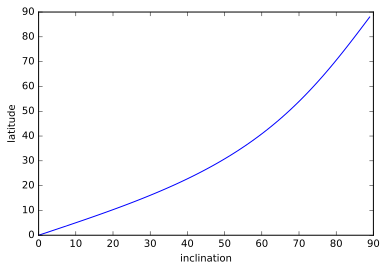

In [81]:
plt.plot(inclination,latitude)
plt.ylabel('latitude')
plt.xlabel('inclination')
plt.show()

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Get local geomagnetic field estimate from IGRF

The **ipmag** function *igrf* uses the International Geomagnetic Reference Field (IGRF) model to estimate the geomagnetic field direction at a particular location and time. Let's find the direction of the geomagnetic field in Berkeley, California (37.87&deg; N, 122.27&deg; W, elevation of 52 m) on August 27, 2013 (in decimal format, 2013.6544).

In [82]:
berk_igrf = ipmag.igrf([2013.6544, .052, 37.871667, -122.272778])
ipmag.igrf_print(berk_igrf)

Declination: 13.950
Inclination: 61.354
Intensity: 13.950 nT


[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Plotting Directions

We can plot this direction using **matplotlib** (**plt**) in conjunction with a few **ipmag** functions. To do this, we first initiate a figure (numbered as Fig. 0, with a size of 6x6) with the following syntax:
```python
plt.figure(num=0,figsize=(6,6))
```
We then draw an equal area stereonet within the figure, specifying the figure number:
```python
ipmag.plot_net(0)
```
Now we can plot the direction we just pulled from IGRF using **ipmag.plot_di()**:
```python
ipmag.plot_di(berk_igrf[0],berk_igrf[1])
```
To label or color the plotted points, we would pass the same code as above but with a few extra arguments and one additional line of code:
```python
ipmag.plot_di(berk_igrf[0],berk_igrf[1], color='r', label="Berkeley, CA -- August 27, 2013")
plt.legend()
```
We may wish to save the figure we just created. To do so, we would pass the following *save* function, specifying 1) the relative path to the folder where we want the figure to be saved and 2) the name of the file with the desired extension (.pdf in this example):
```python
plt.savefig("./Additional_Notebook_Output/Berkeley_IGRF.pdf")
```
To ensure the figure is displayed properly and then cleared from the namespace, it is good practice to end such a code block with the following:
```python
plt.show()
```
Now let's run the code we just developed.

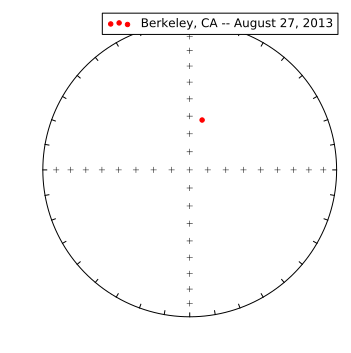

In [83]:
plt.figure(num=0,figsize=(5,5))
ipmag.plot_net(0)
ipmag.plot_di(berk_igrf[0],berk_igrf[1], color='r', label="Berkeley, CA -- August 27, 2013")
plt.legend()
plt.savefig("./Additional_Notebook_Output/Berkeley_IGRF.pdf")
plt.show()

Let's see how this magnetic direction compares to the Geocentric Axial Dipole (GAD) model of the geomagnetic field. We can estimate the expected GAD inclination by passing Berkeley's latitude to the function **ipmag.inc_from_lat**.

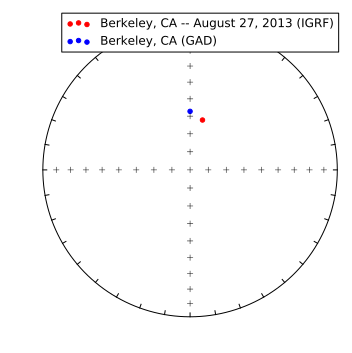

In [84]:
GAD_inc = ipmag.inc_from_lat(37.87)
plt.figure(num=0,figsize=(5,5))
ipmag.plot_net(0)
ipmag.plot_di(berk_igrf[0],berk_igrf[1], color='r', label="Berkeley, CA -- August 27, 2013 (IGRF)")
ipmag.plot_di(0,GAD_inc, color='b', label="Berkeley, CA (GAD)")
plt.legend()
plt.show()

Pretty close! Below, we calculate the angular difference between these two directions. 

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Calculate the Angle Between Directions

While **ipmag** functions have been optimized for the Jupyter notebook environment, there is nothing particularly special about its code. **pmag** functions, originally written for use on the command line, still work in the Jupyter notebook. Here is a demonstration of the  function **pmag.angle**, which calculates the angle between two directions and outputs a **numpy** array. Continuing our comparison from the last section, let's calculate the angle between the IGRF and GAD-estimated magnetic directions plotted above. 

In [85]:
direction1 = [berk_igrf[0],berk_igrf[1]]
direction2 = [0,GAD_inc]
print pmag.angle(direction1,direction2)[0]

8.18973048085


[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Generate and plot Fisher distributed unit vectors from a specified distribution

Let's use the function **ipmag.fishrot** to generate a set of 50 Fisher-distributed directions at a declination of 200&deg; and inclination of 45&deg;. These directions will serve as an example paleomagnetic dataset that will be used for the next several examples. 

In [86]:
fisher_directions = ipmag.fishrot(k=40, n=100, dec=200, inc=50)
directions = pd.DataFrame(fisher_directions,columns=['dec','inc','length'])
directions.head()

,dec,inc,length
0,222.126537,47.671878,1
1,190.790235,43.848716,1
2,217.825713,66.218146,1
3,195.042990,43.834361,1
4,221.689075,59.671360,1


Now let's calculate the Fisher and Bingham means of these data.

In [87]:
fisher_mean = ipmag.fisher_mean(directions.dec,directions.inc)
bingham_mean = ipmag.bingham_mean(directions.dec,directions.inc)

Here's the raw output of the Fisher mean which is a dictionary containing the mean direction and associated statistics:

In [88]:
fisher_mean

{'alpha95': 2.3747459277945642,
 'csd': 13.424602405694099,
 'dec': 200.56214154448855,
 'inc': 50.495281456060226,
 'k': 36.405514534135357,
 'n': 100,
 'r': 97.280631759587592}

The function **ipmag.print_direction_mean** allows an easily readable output of the Fisher mean:

In [89]:
ipmag.print_direction_mean(fisher_mean)

Dec: 200.6  Inc: 50.5
Number of directions in mean (n): 100
Angular radius of 95% confidence (a_95): 2.4
Precision parameter (k) estimate: 36.4


Now we can plot all of our data using the function **ipmag.plot_di**. We can also plot the Fisher mean with its angular radius of 95% confidence ( $\alpha_{95}$ ) using **ipmag.plot_di_mean**.

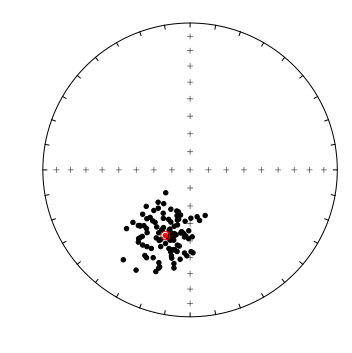

In [90]:
declinations = directions.dec.tolist()
inclinations = directions.inc.tolist()

plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(declinations,inclinations)
ipmag.plot_di_mean(fisher_mean['dec'],fisher_mean['inc'],fisher_mean['alpha95'],color='r')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Flip polarity of directional data

Let's flip all the directions (find their antipodes) of the Fisher-distributed population using the function **ipmag.do_flip()** function and plot the resulting directions.

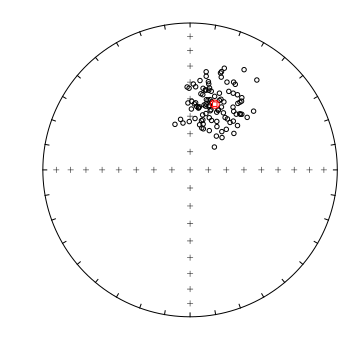

In [91]:
# get reversed directions
reverse = ipmag.do_flip(di_block=ipmag.make_di_block(declinations,inclinations)) # probably should simplify now that flip is changed
rev_directions = pd.DataFrame(reverse,columns=['dec','inc','length'])

# take the Fisher mean of these reversed directions
rev_mean = ipmag.fisher_mean(rev_directions.dec,rev_directions.inc)

# plot the flipped directions
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(rev_directions.dec, rev_directions.inc)
ipmag.plot_di_mean(rev_mean['dec'],rev_mean['inc'],rev_mean['alpha95'],color='r',marker='s')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Test directional data for Fisher distribution

The function **ipmag.fishqq** tests whether directional data are Fisher-distributed. Let's use this test on the random Fisher-distributed directions we just created (it should pass!). 

{'Dec': 200.51158125796545,
 'Inc': 50.540944989031296,
 'Me': 1.0143029172314313,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 0.90547801108017167,
 'Mu_critical': 1.207,
 'N': 100,
 'Test_result': 'consistent with Fisherian model'}

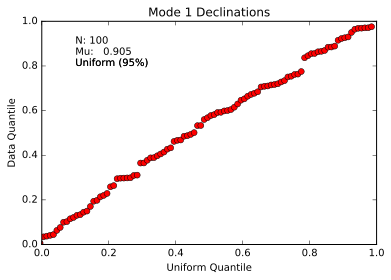

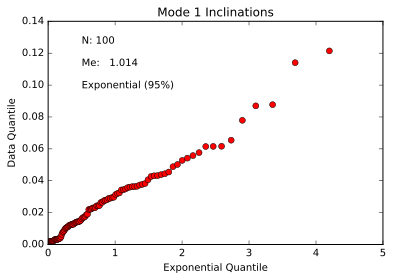

In [92]:
ipmag.fishqq(declinations, inclinations)

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Squish directional data

Inclination flattening can occur for magnetizations in sedimentary rocks. We can simulate inclination error of a specified "flattening factor" with the function **ipmag.squish**. Flattening factors range from 0 (completely flattened) to 1 (no flattening). Let's squish our directions with a 0.4 flattening factor.

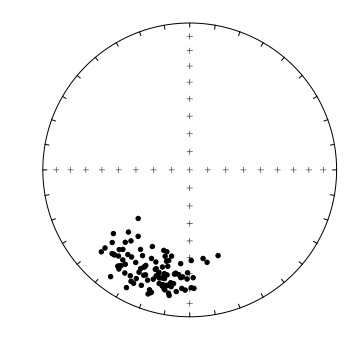

In [93]:
# squish all inclinations
squished_incs = []
for inclination in inclinations:
    squished_incs.append(ipmag.squish(inclination, 0.4))

# plot the squished directional data
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(declinations,squished_incs)
squished_DIs = np.array(zip(declinations,squished_incs))

In [94]:
ipmag.fisher_mean(di_block=squished_DIs)

{'alpha95': 2.6754144390031627,
 'csd': 15.068954261635263,
 'dec': 200.47627569186179,
 'inc': 27.022963980541132,
 'k': 28.893743188353483,
 'n': 100,
 'r': 96.57365266401672}

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Unsquish directional data

We can also "unsquish" data by a specified flattening factor. Let's unsquish the data we squished above with the  function **ipmag.unsquish**. Using a flattening factor of 0.4 will restore the data to its original state.

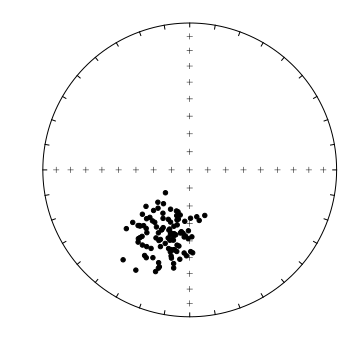

In [95]:
unsquished_incs = []
for squished_inc in squished_incs:
    unsquished_incs.append(ipmag.unsquish(squished_inc, 0.4))

# plot the squished directional data
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(declinations,unsquished_incs)

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Bootstrap Reversal Test

Let's combine the normal and reversed directions from above to simulate a multidirectional data set. We can then carry out two types of reversal tests with **ipmag** to test for bipolarity: the bootstrap reversal test (Tauxe, 2010) and the McFadden and McElhinny (1990) reversal test which is an implementation of the Watson V test for a common mean. 

In [102]:
bipolar_dirs = directions.append(rev_directions)
bipolar_dirs.reset_index(inplace=True, drop='index')
bipolar_dirs.head()

,dec,inc,length
0,222.126537,47.671878,1
1,190.790235,43.848716,1
2,217.825713,66.218146,1
3,195.042990,43.834361,1
4,221.689075,59.671360,1


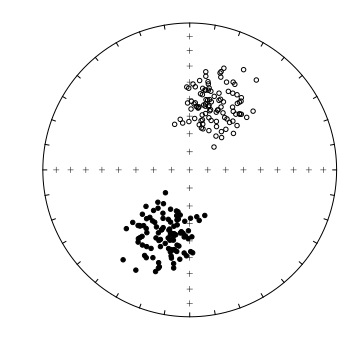

In [103]:
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(bipolar_dirs.dec,bipolar_dirs.inc)

Here are the results of the bootstrap test for a common mean:


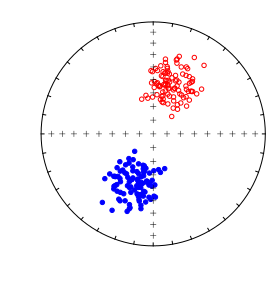

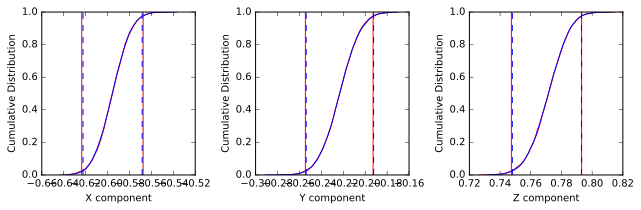

In [104]:
ipmag.reversal_test_bootstrap(bipolar_dirs.dec.tolist(), 
                              bipolar_dirs.inc.tolist(), 
                              plot_stereo=True, save=True, 
                              save_folder='./Additional_Notebook_Output/')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

<a id='MM1990'></a>
## McFadden and McElhinny (1990) Reversal Test

Results of Watson V test: 

Watson's V:           0.0
Critical value of V:  6.1
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 0.0
Critical angle for M&M1990:   3.4
The McFadden and McElhinny (1990) classification for
this test is: 'A'


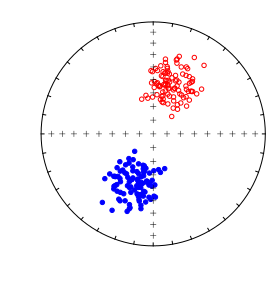

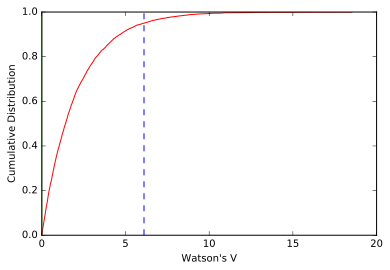

In [105]:
ipmag.reversal_test_MM1990(bipolar_dirs.dec.tolist(), 
                           bipolar_dirs.inc.tolist(), 
                           plot_CDF=True, plot_stereo=True, 
                           save=True, save_folder= './Additional_Notebook_Output/')

[Go to Top](#Jupyter-notebook-demonstrating-the-use-of-additional-PmagPy-functions)

## Working with Poles

A variety of plotting functions within PmagPy, together with the Basemap package of matplotlib, provide a great way to work with paleomagnetic poles, virtual geomagnetic poles, and polar wander paths.

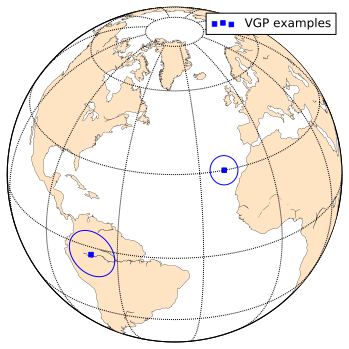

In [106]:
# initiate figure and specify figure size
plt.figure(figsize=(6, 6))

# initiate a Basemap projection, specifying the latitude and
# longitude (lat_0 and lon_0) at which our figure is centered.
pmap = Basemap(projection='ortho',lat_0=30,lon_0=320,
               resolution='c',area_thresh=50000)
# other optional modifications to the globe figure
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))


# Here we plot a pole at 340 E longitude, 30 N latitude with an
# alpha 95 error angle of 5 degrees. Keyword arguments allow us
# to specify the label, shape, and color of this data.
ipmag.plot_pole(pmap,340,30,5,label='VGP examples',
               marker='s',color='Blue')

# We can plot multiple poles sequentially on the same globe using
# the same plot_pole function.
ipmag.plot_pole(pmap,290,-3,9,marker='s',color='Blue')

plt.legend()
# Optional save (uncomment to save the figure)
#plt.savefig('Code_output/VGP_example.pdf')
plt.show()

## Calculate and Plot VGPs

Using the function **ipmag.vgp_calc**, we can calculate virtual geomagnetic poles (VGPs) of our fFisher-distributed directions. We'll need to first assign a location to these magnetic directions - let's assume they are from Berkeley, CA (37.87&deg; N, 122.27&deg; W). 

In [107]:
# plug in site latitude and longitude to the "directions" dataframe
directions['site_lat'] = 37.97
directions['site_lon'] = -122.27

# calculate VGPs (this automatically adds VGP data to the dataframe)
ipmag.vgp_calc(directions, dec_tc = 'dec', inc_tc = 'inc')
directions.head()

,dec,inc,length,site_lat,site_lon,paleolatitude,vgp_lat,vgp_lon,vgp_lat_rev,vgp_lon_rev
0,222.126537,47.671878,1,37.97,-122.27,28.764642,-12.501573,200.696654,12.501573,20.696654
1,190.790235,43.848716,1,37.97,-122.27,25.654952,-25.574273,226.947135,25.574273,46.947135
2,217.825713,66.218146,1,37.97,-122.27,48.608705,2.857178,213.776696,-2.857178,33.776696
3,195.042990,43.834361,1,37.97,-122.27,25.643739,-24.838767,222.788643,24.838767,42.788643
4,221.689075,59.671360,1,37.97,-122.27,40.519399,-2.739245,207.321019,2.739245,27.321019


We have already calculated the Fisher mean of this data, so let's translate it to a VGP too. For a one-line dataset, we plug the Fisher mean data into a **pandas** *Series* instead of a *DataFrame* (a *DataFrame* can be considered a sequence of concatenated *Series*).

In [108]:
mean_pole = pd.Series(fisher_mean)
mean_pole['site_lat'] = 37.97
mean_pole['site_lon'] = -122.27
ipmag.vgp_calc(mean_pole, dec_tc = 'dec', inc_tc = 'inc')
mean_pole

alpha95               2.374746
csd                    13.4246
dec                   200.5621
inc                   50.49528
k                     36.40551
n                          100
r                     97.28063
site_lat                 37.97
site_lon               -122.27
paleolatitude         31.23458
vgp_lat              -18.18515
vgp_lon          219.302636852
vgp_lat_rev           18.18515
vgp_lon_rev           39.30264
dtype: object

Plong: 200.6  Plat: 50.5
Number of directions in mean (n): 100.0
Angular radius of 95% confidence (A_95): 2.4
Precision parameter (k) estimate: 36.4


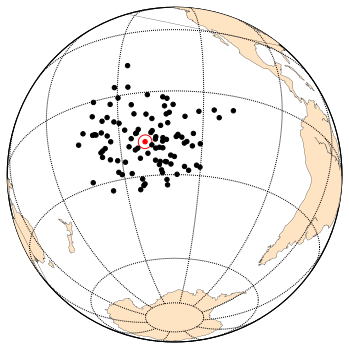

In [109]:
plt.figure(figsize=(6, 6))
pmap = Basemap(projection='ortho',lat_0=-30,lon_0=-130,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

# use the print_pole_mean function to print the mean data above the globe
ipmag.print_pole_mean(mean_pole)
for n in range(len(directions)):
    ipmag.plot_vgp(pmap, directions['vgp_lon'][n], 
                   directions['vgp_lat'][n])
ipmag.plot_pole(pmap, mean_pole['vgp_lon'], mean_pole['vgp_lat'], 
                mean_pole['alpha95'], color='r')

## Plotting APWPs

The capability to plot multiple poles in sequence provides a good way to analyze polar wander paths. Here we use the Phanerozoic APWP of Laurentia *(Torsvik, 2012)* to demonstrate the plot_pole_colorbar function.

We first upload the Torsvik (2012) data using the pandas function *read_csv*. 

In [110]:
Laurentia_Pole_Compilation = pd.read_csv('./Torsvik2012/Laurentia_Pole_Compilation.csv')
Laurentia_Pole_Compilation.head()

,Q,A95,Com,Formation,Lat,Lon,CLat,CLon,RLat,RLon,EULER,Age,GPDB RefNo/Reference
0,5,3.9,NaN,Dunkard Formation,-44.1,301.5,-41.5,300.4,-38.0,43.0,(63.2/_ 13.9/79.9),300,"302, T"
1,5,2.1,NaN,Laborcita Formation,-42.1,312.1,-43.0,313.4,-32.7,52.9,(63.2/_ 13.9/79.9),301,"1311, T"
2,5,3.4,#,Wescogame Formation,-44.1,303.9,-46.3,306.8,-38.2,51.4,(63.2/_ 13.9/79.9),301,"1311, T"
3,6,3.1,I,Glenshaw Formation,-28.6,299.9,-28.6,299.9,-28.6,32.4,(63.2/_ 13.9/79.9),303,Kodama (2009)
4,5,1.8,NaN,Lower Casper Formation,-45.7,308.6,-50.5,314.6,-37.6,59.8,(63.2/_ 13.9/79.9),303,"1455, T"


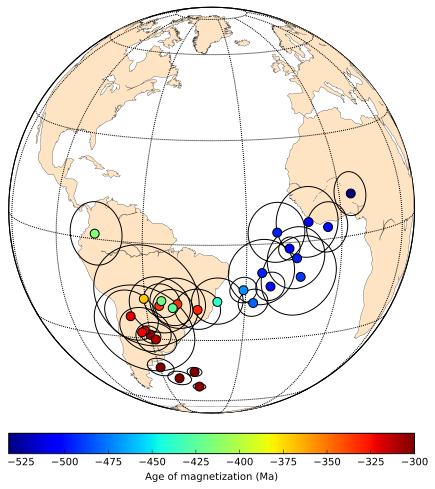

In [111]:
# initiate the figure as in the plot_pole example
plt.figure(figsize=(8, 8))
pmap = Basemap(projection='ortho',lat_0=10,lon_0=320,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

# Loop through the uploaded data and use the plot_pole_colorbar function
# (instead of plot_pole) to plot the individual poles. The input of this
# function is very similar to that of plot_pole but has the additional
# arguments of (1)AGE, (2)MINIMUM AND (3)MAXIMUM AGES OF PLOTTED POLES.
# Note that the ages are treated as negative numbers -- this just determines
# the direction of the colorbar.
for n in xrange (0, len(Laurentia_Pole_Compilation)):
     m = ipmag.plot_pole_colorbar(pmap, Laurentia_Pole_Compilation['CLon'][n],
                                  Laurentia_Pole_Compilation['CLat'][n],
                                  Laurentia_Pole_Compilation['A95'][n],
                                  -Laurentia_Pole_Compilation['Age'][n],
                                  -532,
                                  -300,
                                  markersize=80, color="k", alpha=1)

pmap.colorbar(m,location='bottom',pad="5%",label='Age of magnetization (Ma)')

# Optional save (uncomment to save the figure)
#plt.savefig('Additional_Notebook_Output/plot_pole_colorbar_example.pdf')

plt.show()

## Working with anisotropy data

In [ ]:
def aniso_magic(path_to_file = '.', file_name = 'rmag_anisotropy.txt', 
               save = False, save_folder = '.', fmt='svg', *argv):
    """
    NAME
        aniso_magic.py

    DESCRIPTION
        plots anisotropy data with either bootstrap or hext ellipses

    SYNTAX
        aniso_magic.py [-h] [command line options]
    OPTIONS
        -h plots help message and quits
        -usr USER: set the user name
        -f AFILE, specify rmag_anisotropy formatted file for input
        -F RFILE, specify rmag_results formatted file for output
        -x Hext [1963] and bootstrap
        -B DON'T do bootstrap, do Hext
        -par Tauxe [1998] parametric bootstrap
        -v plot bootstrap eigenvectors instead of ellipses
        -sit plot by site instead of entire file
        -crd [s,g,t] coordinate system, default is specimen (g=geographic, t=tilt corrected)
        -P don't make any plots - just make rmag_results table
        -sav don't make the rmag_results table - just save all the plots
        -fmt [svg, jpg, eps] format for output images, pdf default
        -gtc DEC INC  dec,inc of pole to great circle [down(up) in green (cyan)
        -d Vi DEC INC; Vi (1,2,3) to compare to direction DEC INC
        -nb N; specifies the number of bootstraps - default is 1000
    DEFAULTS
       AFILE:  rmag_anisotropy.txt
       RFILE:  rmag_results.txt
       plot bootstrap ellipses of Constable & Tauxe [1987]
    NOTES
       minor axis: circles
       major axis: triangles
       principal axis: squares
       directions are plotted on the lower hemisphere
       for bootstrapped eigenvector components: Xs: blue, Ys: red, Zs: black
"""
#
    dir_path="."
    version_num=pmag.get_version()
    verbose=pmagplotlib.verbose
    args=sys.argv
    ipar,ihext,ivec,iboot,imeas,isite,iplot,vec=0,0,0,1,1,0,1,0
    hpars,bpars,PDir=[],[],[]
    CS,crd='-1','s'
    nb=1000
    fmt='pdf'
    ResRecs=[]
    orlist=[]
    outfile,comp,Dir,gtcirc,PDir='rmag_results.txt',0,[],0,[]
    infile=os.path.join(path_to_file, file_name)
    if "-h" in args:
        print main.__doc__
        sys.exit()
    if '-WD' in args:
        ind=args.index('-WD')
        dir_path=args[ind+1]
    if '-nb' in args:
        ind=args.index('-nb')
        nb=int(args[ind+1])
    if '-usr' in args:
        ind=args.index('-usr')
        user=args[ind+1]
    else:
        user=""
    if '-B' in args:iboot,ihext=0,1
    if '-par' in args:ipar=1
    if '-x' in args:ihext=1
    if '-v' in args:ivec=1
    if '-sit' in args:isite=1
    if '-P' in args:iplot=0
#     if '-f' in args:
#         ind=args.index('-f')
#         infile=args[ind+1]
#     if '-F' in args:
#         ind=args.index('-F')
#         outfile=args[ind+1]
    if '-crd' in sys.argv:
        ind=sys.argv.index('-crd')
        crd=sys.argv[ind+1]
        if crd=='g':CS='0'
        if crd=='t': CS='100'
    if '-fmt' in args:
        ind=args.index('-fmt')
        fmt=args[ind+1]
    if '-sav' in args:
        plots=1
        verbose=0
    else:
        plots=0
    if '-gtc' in args:
        d, i = 110.0, 2.0
        PDir.append(d)
        PDir.append(i)
#         ind=args.index('-gtc')
#         d,i=float(args[ind+1]),float(args[ind+2])
#         PDir.append(d)
#         PDir.append(i)
    if '-d' in args:
        comp=1
        ind=args.index('-d')
        vec=int(args[ind+1])-1
        Dir=[float(args[ind+2]),float(args[ind+3])]
#
# set up plots
#
#     if infile[0]!='/':infile=dir_path+'/'+infile
    if outfile[0]!='/':outfile=dir_path+'/'+outfile
    ANIS={}
    initcdf,inittcdf=0,0
    ANIS['data'],ANIS['conf']=1,2
    if iboot==1:
        ANIS['tcdf']=3
        if iplot==1:
            inittcdf=1
            plt.figure(num=ANIS['tcdf'], figsize=(5,5))
            #pmagplotlib.plot_init(ANIS['tcdf'],5,5)
        if comp==1 and iplot==1:
            initcdf=1
            ANIS['vxcdf'],ANIS['vycdf'],ANIS['vzcdf']=4,5,6
            plt.figure(num=ANIS['vxcdf'], figsize=(5,5))
            plt.figure(num=ANIS['vycdf'], figsize=(5,5))
            plt.figure(num=ANIS['vzcdf'], figsize=(5,5))
#             pmagplotlib.plot_init(ANIS['vxcdf'],5,5)
#             pmagplotlib.plot_init(ANIS['vycdf'],5,5)
#             pmagplotlib.plot_init(ANIS['vzcdf'],5,5)
    if iplot==1:
        plt.figure(num=ANIS['conf'], figsize=(5,5))
        plt.figure(num=ANIS['data'], figsize=(5,5))
#         pmagplotlib.plot_init(ANIS['conf'],5,5)
#         pmagplotlib.plot_init(ANIS['data'],5,5)
# read in the data
    data,ifiletype=pmag.magic_read(infile)
    for rec in data:  # find all the orientation systems
        if 'anisotropy_tilt_correction' not in rec.keys():rec['anisotropy_tilt_correction']='-1'
        if rec['anisotropy_tilt_correction'] not in orlist:
            orlist.append(rec['anisotropy_tilt_correction'])
    if CS not in orlist:
        if len(orlist)>0:
            CS=orlist[0]
        else:
            CS='-1'
        if CS=='-1':crd='s'
        if CS=='0':crd='g'
        if CS=='100':crd='t'
        if verbose:print "desired coordinate system not available, using available: ",crd
    if isite==1:
        sitelist=[]
        for rec in data:
            if rec['er_site_name'] not in sitelist:sitelist.append(rec['er_site_name'])
        sitelist.sort()
        plot_len=len(sitelist)
    else:plot_len=1
    k=0
    while k<plot_len:
        site=""
        sdata,Ss=[],[] # list of S format data
        Locs,Sites,Samples,Specimens,Cits=[],[],[],[],[]
        if isite==0:
            sdata=data
        else:
            site=sitelist[k]
            for rec in data:
                if rec['er_site_name']==site:sdata.append(rec)
        anitypes=[]
        csrecs=pmag.get_dictitem(sdata,'anisotropy_tilt_correction',CS,'T')
        for rec in csrecs:
            if rec['anisotropy_type'] not in anitypes:anitypes.append(rec['anisotropy_type'])
            if rec['er_location_name'] not in Locs:Locs.append(rec['er_location_name'])
            if rec['er_site_name'] not in Sites:Sites.append(rec['er_site_name'])
            if rec['er_sample_name'] not in Samples:Samples.append(rec['er_sample_name'])
            if rec['er_specimen_name'] not in Specimens:Specimens.append(rec['er_specimen_name'])
            if rec['er_citation_names'] not in Cits:Cits.append(rec['er_citation_names'])
            s=[]
            s.append(float(rec["anisotropy_s1"]))
            s.append(float(rec["anisotropy_s2"]))
            s.append(float(rec["anisotropy_s3"]))
            s.append(float(rec["anisotropy_s4"]))
            s.append(float(rec["anisotropy_s5"]))
            s.append(float(rec["anisotropy_s6"]))
            if s[0]<=1.0:Ss.append(s) # protect against crap
            #tau,Vdirs=pmag.doseigs(s)
            fpars=pmag.dohext(int(rec["anisotropy_n"])-6,float(rec["anisotropy_sigma"]),s)
            ResRec={}
            ResRec['er_location_names']=rec['er_location_name']
            ResRec['er_citation_names']=rec['er_citation_names']
            ResRec['er_site_names']=rec['er_site_name']
            ResRec['er_sample_names']=rec['er_sample_name']
            ResRec['er_specimen_names']=rec['er_specimen_name']
            ResRec['rmag_result_name']=rec['er_specimen_name']+":"+rec['anisotropy_type']
            ResRec["er_analyst_mail_names"]=user
            ResRec["tilt_correction"]=CS
            ResRec["anisotropy_type"]=rec['anisotropy_type']
            ResRec["anisotropy_v1_dec"]='%7.1f'%(fpars['v1_dec'])
            ResRec["anisotropy_v2_dec"]='%7.1f'%(fpars['v2_dec'])
            ResRec["anisotropy_v3_dec"]='%7.1f'%(fpars['v3_dec'])
            ResRec["anisotropy_v1_inc"]='%7.1f'%(fpars['v1_inc'])
            ResRec["anisotropy_v2_inc"]='%7.1f'%(fpars['v2_inc'])
            ResRec["anisotropy_v3_inc"]='%7.1f'%(fpars['v3_inc'])
            ResRec["anisotropy_t1"]='%10.8f'%(fpars['t1'])
            ResRec["anisotropy_t2"]='%10.8f'%(fpars['t2'])
            ResRec["anisotropy_t3"]='%10.8f'%(fpars['t3'])
            ResRec["anisotropy_ftest"]='%10.3f'%(fpars['F'])
            ResRec["anisotropy_ftest12"]='%10.3f'%(fpars['F12'])
            ResRec["anisotropy_ftest23"]='%10.3f'%(fpars['F23'])
            ResRec["result_description"]='F_crit: '+fpars['F_crit']+'; F12,F23_crit: '+fpars['F12_crit']
            ResRec['anisotropy_type']=pmag.makelist(anitypes)
            ResRecs.append(ResRec)
        if len(Ss)>1:
            title="LO:_"+ResRec['er_location_names']+'_SI:_'+site+'_SA:__SP:__CO:_'+crd
            ResRec['er_location_names']=pmag.makelist(Locs)
            bpars,hpars=pmagplotlib.plotANIS(ANIS,Ss,iboot,ihext,ivec,ipar,title,iplot,comp,vec,Dir,nb)
            if len(PDir)>0:
                pmagplotlib.plotC(ANIS['data'],PDir,90.,'g')
                pmagplotlib.plotC(ANIS['conf'],PDir,90.,'g')
            if verbose and plots==0:pmagplotlib.drawFIGS(ANIS)
            ResRec['er_location_names']=pmag.makelist(Locs)
            if plots==1:
                save(ANIS,fmt,title)
            ResRec={}
            ResRec['er_citation_names']=pmag.makelist(Cits)
            ResRec['er_location_names']=pmag.makelist(Locs)
            ResRec['er_site_names']=pmag.makelist(Sites)
            ResRec['er_sample_names']=pmag.makelist(Samples)
            ResRec['er_specimen_names']=pmag.makelist(Specimens)
            ResRec['rmag_result_name']=pmag.makelist(Sites)+":"+pmag.makelist(anitypes)
            ResRec['anisotropy_type']=pmag.makelist(anitypes)
            ResRec["er_analyst_mail_names"]=user
            ResRec["tilt_correction"]=CS
            if isite=="0":ResRec['result_description']="Study average using coordinate system: "+ CS
            if isite=="1":ResRec['result_description']="Site average using coordinate system: " +CS
            if hpars!=[] and ihext==1:
                HextRec={}
                for key in ResRec.keys():HextRec[key]=ResRec[key]   # copy over stuff
                HextRec["anisotropy_v1_dec"]='%7.1f'%(hpars["v1_dec"])
                HextRec["anisotropy_v2_dec"]='%7.1f'%(hpars["v2_dec"])
                HextRec["anisotropy_v3_dec"]='%7.1f'%(hpars["v3_dec"])
                HextRec["anisotropy_v1_inc"]='%7.1f'%(hpars["v1_inc"])
                HextRec["anisotropy_v2_inc"]='%7.1f'%(hpars["v2_inc"])
                HextRec["anisotropy_v3_inc"]='%7.1f'%(hpars["v3_inc"])
                HextRec["anisotropy_t1"]='%10.8f'%(hpars["t1"])
                HextRec["anisotropy_t2"]='%10.8f'%(hpars["t2"])
                HextRec["anisotropy_t3"]='%10.8f'%(hpars["t3"])
                HextRec["anisotropy_hext_F"]='%7.1f '%(hpars["F"])
                HextRec["anisotropy_hext_F12"]='%7.1f '%(hpars["F12"])
                HextRec["anisotropy_hext_F23"]='%7.1f '%(hpars["F23"])
                HextRec["anisotropy_v1_eta_semi_angle"]='%7.1f '%(hpars["e12"])
                HextRec["anisotropy_v1_eta_dec"]='%7.1f '%(hpars["v2_dec"])
                HextRec["anisotropy_v1_eta_inc"]='%7.1f '%(hpars["v2_inc"])
                HextRec["anisotropy_v1_zeta_semi_angle"]='%7.1f '%(hpars["e13"])
                HextRec["anisotropy_v1_zeta_dec"]='%7.1f '%(hpars["v3_dec"])
                HextRec["anisotropy_v1_zeta_inc"]='%7.1f '%(hpars["v3_inc"])
                HextRec["anisotropy_v2_eta_semi_angle"]='%7.1f '%(hpars["e12"])
                HextRec["anisotropy_v2_eta_dec"]='%7.1f '%(hpars["v1_dec"])
                HextRec["anisotropy_v2_eta_inc"]='%7.1f '%(hpars["v1_inc"])
                HextRec["anisotropy_v2_zeta_semi_angle"]='%7.1f '%(hpars["e23"])
                HextRec["anisotropy_v2_zeta_dec"]='%7.1f '%(hpars["v3_dec"])
                HextRec["anisotropy_v2_zeta_inc"]='%7.1f '%(hpars["v3_inc"])
                HextRec["anisotropy_v3_eta_semi_angle"]='%7.1f '%(hpars["e12"])
                HextRec["anisotropy_v3_eta_dec"]='%7.1f '%(hpars["v1_dec"])
                HextRec["anisotropy_v3_eta_inc"]='%7.1f '%(hpars["v1_inc"])
                HextRec["anisotropy_v3_zeta_semi_angle"]='%7.1f '%(hpars["e23"])
                HextRec["anisotropy_v3_zeta_dec"]='%7.1f '%(hpars["v2_dec"])
                HextRec["anisotropy_v3_zeta_inc"]='%7.1f '%(hpars["v2_inc"])
                HextRec["magic_method_codes"]='LP-AN:AE-H'
                if verbose:
                    print "Hext Statistics: "
                    print " tau_i, V_i_D, V_i_I, V_i_zeta, V_i_zeta_D, V_i_zeta_I, V_i_eta, V_i_eta_D, V_i_eta_I"
                    print HextRec["anisotropy_t1"], HextRec["anisotropy_v1_dec"], HextRec["anisotropy_v1_inc"], HextRec["anisotropy_v1_eta_semi_angle"], HextRec["anisotropy_v1_eta_dec"], HextRec["anisotropy_v1_eta_inc"], HextRec["anisotropy_v1_zeta_semi_angle"], HextRec["anisotropy_v1_zeta_dec"], HextRec["anisotropy_v1_zeta_inc"]
                    print HextRec["anisotropy_t2"],HextRec["anisotropy_v2_dec"], HextRec["anisotropy_v2_inc"], HextRec["anisotropy_v2_eta_semi_angle"], HextRec["anisotropy_v2_eta_dec"], HextRec["anisotropy_v2_eta_inc"], HextRec["anisotropy_v2_zeta_semi_angle"], HextRec["anisotropy_v2_zeta_dec"], HextRec["anisotropy_v2_zeta_inc"]
                    print HextRec["anisotropy_t3"], HextRec["anisotropy_v3_dec"], HextRec["anisotropy_v3_inc"], HextRec["anisotropy_v3_eta_semi_angle"], HextRec["anisotropy_v3_eta_dec"], HextRec["anisotropy_v3_eta_inc"], HextRec["anisotropy_v3_zeta_semi_angle"], HextRec["anisotropy_v3_zeta_dec"], HextRec["anisotropy_v3_zeta_inc"]
                HextRec['magic_software_packages']=version_num
                ResRecs.append(HextRec)
            if bpars!=[]:
                BootRec={}
                for key in ResRec.keys():BootRec[key]=ResRec[key]   # copy over stuff
                BootRec["anisotropy_v1_dec"]='%7.1f'%(bpars["v1_dec"])
                BootRec["anisotropy_v2_dec"]='%7.1f'%(bpars["v2_dec"])
                BootRec["anisotropy_v3_dec"]='%7.1f'%(bpars["v3_dec"])
                BootRec["anisotropy_v1_inc"]='%7.1f'%(bpars["v1_inc"])
                BootRec["anisotropy_v2_inc"]='%7.1f'%(bpars["v2_inc"])
                BootRec["anisotropy_v3_inc"]='%7.1f'%(bpars["v3_inc"])
                BootRec["anisotropy_t1"]='%10.8f'%(bpars["t1"])
                BootRec["anisotropy_t2"]='%10.8f'%(bpars["t2"])
                BootRec["anisotropy_t3"]='%10.8f'%(bpars["t3"])
                BootRec["anisotropy_v1_eta_inc"]='%7.1f '%(bpars["v1_eta_inc"])
                BootRec["anisotropy_v1_eta_dec"]='%7.1f '%(bpars["v1_eta_dec"])
                BootRec["anisotropy_v1_eta_semi_angle"]='%7.1f '%(bpars["v1_eta"])
                BootRec["anisotropy_v1_zeta_inc"]='%7.1f '%(bpars["v1_zeta_inc"])
                BootRec["anisotropy_v1_zeta_dec"]='%7.1f '%(bpars["v1_zeta_dec"])
                BootRec["anisotropy_v1_zeta_semi_angle"]='%7.1f '%(bpars["v1_zeta"])
                BootRec["anisotropy_v2_eta_inc"]='%7.1f '%(bpars["v2_eta_inc"])
                BootRec["anisotropy_v2_eta_dec"]='%7.1f '%(bpars["v2_eta_dec"])
                BootRec["anisotropy_v2_eta_semi_angle"]='%7.1f '%(bpars["v2_eta"])
                BootRec["anisotropy_v2_zeta_inc"]='%7.1f '%(bpars["v2_zeta_inc"])
                BootRec["anisotropy_v2_zeta_dec"]='%7.1f '%(bpars["v2_zeta_dec"])
                BootRec["anisotropy_v2_zeta_semi_angle"]='%7.1f '%(bpars["v2_zeta"])
                BootRec["anisotropy_v3_eta_inc"]='%7.1f '%(bpars["v3_eta_inc"])
                BootRec["anisotropy_v3_eta_dec"]='%7.1f '%(bpars["v3_eta_dec"])
                BootRec["anisotropy_v3_eta_semi_angle"]='%7.1f '%(bpars["v3_eta"])
                BootRec["anisotropy_v3_zeta_inc"]='%7.1f '%(bpars["v3_zeta_inc"])
                BootRec["anisotropy_v3_zeta_dec"]='%7.1f '%(bpars["v3_zeta_dec"])
                BootRec["anisotropy_v3_zeta_semi_angle"]='%7.1f '%(bpars["v3_zeta"])
                BootRec["anisotropy_hext_F"]=''
                BootRec["anisotropy_hext_F12"]=''
                BootRec["anisotropy_hext_F23"]=''
                BootRec["magic_method_codes"]='LP-AN:AE-H:AE-BS' # regular bootstrap
                if ipar==1:BootRec["magic_method_codes"]='LP-AN:AE-H:AE-BS-P' # parametric bootstrap
                if verbose:
                    print "Boostrap Statistics: "
                    print " tau_i, V_i_D, V_i_I, V_i_zeta, V_i_zeta_D, V_i_zeta_I, V_i_eta, V_i_eta_D, V_i_eta_I"
                    print BootRec["anisotropy_t1"], BootRec["anisotropy_v1_dec"], BootRec["anisotropy_v1_inc"], BootRec["anisotropy_v1_eta_semi_angle"], BootRec["anisotropy_v1_eta_dec"], BootRec["anisotropy_v1_eta_inc"], BootRec["anisotropy_v1_zeta_semi_angle"], BootRec["anisotropy_v1_zeta_dec"], BootRec["anisotropy_v1_zeta_inc"]
                    print BootRec["anisotropy_t2"],BootRec["anisotropy_v2_dec"], BootRec["anisotropy_v2_inc"], BootRec["anisotropy_v2_eta_semi_angle"], BootRec["anisotropy_v2_eta_dec"], BootRec["anisotropy_v2_eta_inc"], BootRec["anisotropy_v2_zeta_semi_angle"], BootRec["anisotropy_v2_zeta_dec"], BootRec["anisotropy_v2_zeta_inc"]
                    print BootRec["anisotropy_t3"], BootRec["anisotropy_v3_dec"], BootRec["anisotropy_v3_inc"], BootRec["anisotropy_v3_eta_semi_angle"], BootRec["anisotropy_v3_eta_dec"], BootRec["anisotropy_v3_eta_inc"], BootRec["anisotropy_v3_zeta_semi_angle"], BootRec["anisotropy_v3_zeta_dec"], BootRec["anisotropy_v3_zeta_inc"]
                BootRec['magic_software_packages']=version_num
                ResRecs.append(BootRec)
            k+=1
            goon=1
            while goon==1 and iplot==1 and verbose:
                if iboot==1: print "compare with [d]irection "
                print " plot [g]reat circle,  change [c]oord. system, change [e]llipse calculation,  s[a]ve plots, [q]uit "
                if isite==1: print "  [p]revious, [s]ite, [q]uit, <return> for next "
                ans=raw_input("")
                if ans=="q":
                    sys.exit()
                if ans=="e":
                    iboot,ipar,ihext,ivec=1,0,0,0
                    e=raw_input("Do Hext Statistics  1/[0]: ")
                    if e=="1":ihext=1
                    e=raw_input("Suppress bootstrap 1/[0]: ")
                    if e=="1":iboot=0
                    if iboot==1:
                        e=raw_input("Parametric bootstrap 1/[0]: ")
                        if e=="1":ipar=1
                        e=raw_input("Plot bootstrap eigenvectors:  1/[0]: ")
                        if e=="1":ivec=1
                        if iplot==1:
                            if inittcdf==0:
                                ANIS['tcdf']=3
                                pmagplotlib.plot_init(ANIS['tcdf'],5,5)
                                inittcdf=1
                    bpars,hpars=pmagplotlib.plotANIS(ANIS,Ss,iboot,ihext,ivec,ipar,title,iplot,comp,vec,Dir,nb)
                    if verbose and plots==0:pmagplotlib.drawFIGS(ANIS)
                if ans=="c":
                    print "Current Coordinate system is: "
                    if CS=='-1':print " Specimen"
                    if CS=='0':print " Geographic"
                    if CS=='100':print " Tilt corrected"
                    key=raw_input(" Enter desired coordinate system: [s]pecimen, [g]eographic, [t]ilt corrected ")
                    if key=='s':CS='-1'
                    if key=='g':CS='0'
                    if key=='t': CS='100'
                    if CS not in orlist:
                        if len(orlist)>0:
                            CS=orlist[0]
                        else:
                            CS='-1'
                        if CS=='-1':crd='s'
                        if CS=='0':crd='g'
                        if CS=='100':crd='t'
                        print "desired coordinate system not available, using available: ",crd
                    k-=1
                    goon=0
                if ans=="":
                    if isite==1:
                        goon=0
                    else:
                        print "Good bye "
                        sys.exit()
                if ans=='d':
                    if initcdf==0:
                        initcdf=1
                        ANIS['vxcdf'],ANIS['vycdf'],ANIS['vzcdf']=4,5,6
                        pmagplotlib.plot_init(ANIS['vxcdf'],5,5)
                        pmagplotlib.plot_init(ANIS['vycdf'],5,5)
                        pmagplotlib.plot_init(ANIS['vzcdf'],5,5)
                    Dir,comp=[],1
                    print """
                      Input: Vi D I to  compare  eigenvector Vi with direction D/I
                             where Vi=1: principal
                                   Vi=2: major
                                   Vi=3: minor
                                   D= declination of comparison direction
                                   I= inclination of comparison direction"""
                    con=1
                    while con==1:
                        try:
                            vdi=raw_input("Vi D I: ").split()
                            vec=int(vdi[0])-1
                            Dir=[float(vdi[1]),float(vdi[2])]
                            con=0
                        except IndexError:
                            print " Incorrect entry, try again "
                    bpars,hpars=pmagplotlib.plotANIS(ANIS,Ss,iboot,ihext,ivec,ipar,title,iplot,comp,vec,Dir,nb)
                    Dir,comp=[],0
                if ans=='g':
                    con,cnt=1,0
                    while con==1:
                        try:
                            print " Input:  input pole to great circle ( D I) to  plot a great circle:   "
                            di=raw_input(" D I: ").split()
                            PDir.append(float(di[0]))
                            PDir.append(float(di[1]))
                            con=0
                        except:
                            cnt+=1
                            if cnt<10:
                                print " enter the dec and inc of the pole on one line "
                            else:
                                print "ummm - you are doing something wrong - i give up"
                                sys.exit()
                    pmagplotlib.plotC(ANIS['data'],PDir,90.,'g')
                    pmagplotlib.plotC(ANIS['conf'],PDir,90.,'g')
                    if verbose and plots==0:pmagplotlib.drawFIGS(ANIS)
                if ans=="p":
                    k-=2
                    goon=0
                if ans=="q":
                    k=plot_len
                    goon=0
                if ans=="s":
                    keepon=1
                    site=raw_input(" print site or part of site desired: ")
                    while keepon==1:
                        try:
                            k=sitelist.index(site)
                            keepon=0
                        except:
                            tmplist=[]
                            for qq in range(len(sitelist)):
                                if site in sitelist[qq]:tmplist.append(sitelist[qq])
                            print site," not found, but this was: "
                            print tmplist
                            site=raw_input('Select one or try again\n ')
                            k=sitelist.index(site)
                    goon,ans=0,""
                if ans=="a":
                    locs=pmag.makelist(Locs)
                    title="LO:_"+locs+'_SI:__'+'_SA:__SP:__CO:_'+crd
                    save(ANIS,fmt,title)
                    goon=0
        else:
            if verbose:print 'skipping plot - not enough data points'
            k+=1
#   put rmag_results stuff here
    if len(ResRecs)>0:
        ResOut,keylist=pmag.fillkeys(ResRecs)
        pmag.magic_write(outfile,ResOut,'rmag_results')
    if verbose:
        print " Good bye "

In [ ]:
aniso_magic(path_to_file= './PmagPy_Datafiles/aniso_magic/', file_name='dike_anisotropy.txt')

In [ ]:
aniso_data = pd.read_csv('./PmagPy_Datafiles/ani_depthplot/rmag_anisotropy.txt',delimiter='\t',skiprows=1)
aniso_data.head()

In [ ]:
ipmag.aniso_depthplot(dir_path='./PmagPy_Datafiles/ani_depthplot/');

In [ ]:
def dmag_magic(path_to_file = '.', file_name = 'magic_measurements.txt', 
               save = False, save_folder = '.', fmt='svg', obj='loc', 
               treat=None, XLP = "", normalize = False):
    """
    NAME
        dmag_magic.py

    DESCRIPTION
       plots intensity decay curves for demagnetization experiments

    SYNTAX 
        dmag_magic -h [command line options]
    
    INPUT 
       takes magic formatted magic_measurements.txt files
    
    OPTIONS
        -h prints help message and quits
        -f FILE: specify input file, default is: magic_measurements.txt
        -obj OBJ: specify  object  [loc, sit, sam, spc] for plot, default is by location
        -LT [AF,T,M]: specify lab treatment type, default AF
        -XLP [PI]: exclude specific  lab protocols (for example, method codes like LP-PI)
        -N do not normalize by NRM magnetization
        -sav save plots silently and quit
    NOTE
        loc: location (study); sit: site; sam: sample; spc: specimen
    """
    try:
        from IPython.display import clear_output
    except:
        pass
    FIG={} # plot dictionary
    FIG['demag']=1 # demag is figure 1
    in_file,plot_key,LT=os.path.join(path_to_file, file_name),'er_location_name',"LT-AF-Z"
#     XLP=""
    norm=1
    LT='LT-AF-Z'
    units,dmag_key='T','treatment_ac_field'
    plot_key='er_location_name'
    plot_num=0
#     if '-h' in sys.argv:
#         print main.__doc__
#         sys.exit()
    if normalize==True:
        norm=0
    if save == True:
        plot_num=1
#     if '-f' in sys.argv:
#         ind=sys.argv.index("-f")
#         in_file=sys.argv[ind+1]
    plot_by=obj
    if plot_by=='sit':plot_key='er_site_name'
    if plot_by=='sam':plot_key='er_sample_name'
    if plot_by=='spc':plot_key='er_specimen_name'
#     if '-XLP' in sys.argv:
#         ind=sys.argv.index("-XLP")
#         XLP=sys.argv[ind+1] # get lab protocol for excluding
    if treat != None:
        #ind=sys.argv.index("-LT")
        LT='LT-'+treat+'-Z' # get lab treatment for plotting
        if  LT=='LT-T-Z':
            units,dmag_key='K','treatment_temp'
        elif  LT=='LT-AF-Z':
            units,dmag_key='T','treatment_ac_field'
        elif  LT=='LT-M-Z':
            units,dmag_key='J','treatment_mw_energy'
        else:
            units='U'
    plot_dict = {}
    data,file_type=pmag.magic_read(in_file)
    sids=pmag.get_specs(data)
#     pmagplotlib.plot_init(FIG['demag'],5,5)
    plt.figure(num=FIG['demag'],figsize=(5,5))
    print len(data),' records read from ',in_file
    #
    #
    # find desired intensity data
    #
    # get plotlist
    #
    plotlist,intlist=[],['measurement_magnitude','measurement_magn_moment','measurement_magn_volume','measurement_magn_mass']
    IntMeths=[]
    FixData=[]
    for rec in data:
        meths=[]
        methcodes=rec['magic_method_codes'].split(':')
        for meth in methcodes:meths.append(meth.strip())
        for key in rec.keys():
            if key in intlist and rec[key]!="":
                if key not in IntMeths:IntMeths.append(key)
                if rec[plot_key] not in plotlist and LT in meths: plotlist.append(rec[plot_key])
                if 'measurement_flag' not in rec.keys():rec['measurement_flag']='g'
                FixData.append(rec)
        plotlist.sort()
    if len(IntMeths)==0:
        print 'No intensity information found'
        return
    data=FixData
    int_key=IntMeths[0] # plot first intensity method found - normalized to initial value anyway - doesn't matter which used
    print meths
    for plot in plotlist:
        if plot_num==0:
            clear_output(wait=True)
            print plot,'plotting by: ',plot_key
        PLTblock=pmag.get_dictitem(data,plot_key,plot,'T') # fish out all the data for this type of plot
        PLTblock=pmag.get_dictitem(PLTblock,'magic_method_codes',LT,'has') # fish out all the dmag for this experiment type
        PLTblock=pmag.get_dictitem(PLTblock,int_key,'','F') # get all with this intensity key non-blank
        if XLP!="":PLTblock=pmag.get_dictitem(PLTblock,'magic_method_codes',XLP,'not') # reject data with XLP in method_code
        if len(PLTblock)>2:
            title=PLTblock[0][plot_key]
            spcs=[]
            for rec in PLTblock:
                if rec['er_specimen_name'] not in spcs:spcs.append(rec['er_specimen_name'])
            for spc in spcs:
                SPCblock=pmag.get_dictitem(PLTblock,'er_specimen_name',spc,'T') # plot specimen by specimen
                INTblock=[]
                for rec in SPCblock:
                    INTblock.append([float(rec[dmag_key]),0,0,float(rec[int_key]),1,rec['measurement_flag']])
                if len(INTblock)>2:
                    pmagplotlib.plotMT(FIG['demag'],INTblock,title,0,units,norm)
#         plot_dict[title] = pmagplotlib.drawFIGS(FIG)
#         ipmagplotlib.clearFIG(FIG['demag'])
#             if plot_num==1:
#                 files={}
#                 for key in FIG.keys():
#                     files[key]=title+'_'+LT+'.svg' 
#                 ipmagplotlib.saveP(FIG,files) 
#             else:
#                 pmagplotlib.drawFIGS(FIG)
    while True:
        print plot_dict
        #print plot_dict.keys()
        plot_ind = raw_input("Type demag plot you wish to see: ")
        plot_dict[plot_ind]
        plt.show()
        cont = raw_input("Continue? Type [q] to quit")
        if cont=='q':
            return
#                 plt.show()
#                 ans=raw_input(" S[a]ve to save plot, [q]uit,  Return to continue:  ")
#                 if ans=='q':sys.exit()
#                 if ans=="a": 
#                     files={}
#                     for key in FIG.keys():
#                         files[key]=title+'_'+LT+'.svg' 
#                     ipmagplotlib.saveP(FIG,files) 
#             ipmagplotlib.clearFIG(FIG['demag'])

In [ ]:
dmag_magic(path_to_file='./Example_Data/Swanson-Hysell2014/', obj='sit', treat='AF')

## Susceptibility vs. temperature, applied field and frequency

This example makes use of the PmagPy function **chi_magic.py**.

In [ ]:
ipmag.chi_magic(path_to_file='./PmagPy_Datafiles/chi_magic/',
          file_name='chi_magic_example.dat', save=True, 
          save_folder='Additional_Notebook_Output')

## Curie temperature data

In [ ]:
ipmag.curie(path_to_file='./PmagPy_Datafiles/curie/',
            file_name='curie_example.dat', save=True, 
            save_folder='Additional_Notebook_Output')

## Day plots

Demonstration of Day plots, squareness/coercivity and squareness/coercivity of remanence diagrams using hysteresis data.

In [ ]:
ipmag.dayplot(path_to_file='./PmagPy_Datafiles/dayplot_magic/', 
              hyst_file='dayplot_magic_example.dat',
              save=True,save_folder='Additional_Notebook_Output/');

## Hysteresis Loops

In [ ]:
def hysteresis_magic(path_to_file = '.',hyst_file="rmag_hysteresis.txt", 
                     save = False, save_folder = '.', fmt = "svg"):
    """
    Calculates hysteresis parameters, saves them in rmag_hysteresis format file,
    and makes hysteresis plots if option selected.
    
    Optional Keywords (defaults are used if not specified)
    ----------
    path_to_file : path to directory that contains files (default is current directory, '.')
    hyst_file : hysteresis file (default is 'rmag_hysteresis.txt')
    save : boolean argument to save plots (default is False)
    save_folder : relative directory where plots will be saved (default is current directory, '.')
    fmt : format of saved figures (default is 'pdf')
    """
    args=sys.argv
    PLT=1
    plots=0
    user,meas_file,rmag_out,rmag_file="","agm_measurements.txt","rmag_hysteresis.txt",""
    pltspec=""
    dir_path='.'
    verbose=pmagplotlib.verbose
    version_num=pmag.get_version()
    rmag_out=dir_path+'/'+rmag_out
    meas_file=path_to_file+'/'+hyst_file
    rmag_rem=dir_path+"/rmag_remanence.txt"
    #
    #
    meas_data,file_type=pmag.magic_read(meas_file)
    if file_type!='magic_measurements':
        print hysteresis_magic.__doc__
        print 'bad file'
        sys.exit()
    #
    # initialize some variables
    # define figure numbers for hyst,deltaM,DdeltaM curves
    HystRecs,RemRecs=[],[]
    HDD={}
    if verbose:
        if verbose and PLT:print "Plots may be on top of each other - use mouse to place "
    if PLT:
        HDD['hyst'],HDD['deltaM'],HDD['DdeltaM']=1,2,3
        plt.figure(num=HDD['DdeltaM'],figsize=(5,5))
        plt.figure(num=HDD['deltaM'],figsize=(5,5))
        plt.figure(num=HDD['hyst'],figsize=(5,5))
        imag_init=0
        irm_init=0
    else:
        HDD['hyst'],HDD['deltaM'],HDD['DdeltaM'],HDD['irm'],HDD['imag']=0,0,0,0,0
    #
    if rmag_file!="":hyst_data,file_type=pmag.magic_read(rmag_file)
    #
    # get list of unique experiment names and specimen names
    #
    experiment_names,sids=[],[]
    for rec in meas_data: 
        meths=rec['magic_method_codes'].split(':')
        methods=[]
        for meth in meths:
            methods.append(meth.strip())
        if 'LP-HYS' in methods:
            if 'er_synthetic_name' in rec.keys() and rec['er_synthetic_name']!="":
                rec['er_specimen_name']=rec['er_synthetic_name']
            if rec['magic_experiment_name'] not in experiment_names:experiment_names.append(rec['magic_experiment_name'])
            if rec['er_specimen_name'] not in sids:sids.append(rec['er_specimen_name'])
    #
    k=0
    locname=''
    if pltspec!="":
        k=sids.index(pltspec)
        print sids[k]
    while k < len(sids):
        s=sids[k]
        if verbose and PLT:print s, k+1 , 'out of ',len(sids)
    #
    #
        B,M,Bdcd,Mdcd=[],[],[],[] #B,M for hysteresis, Bdcd,Mdcd for irm-dcd data
        Bimag,Mimag=[],[] #Bimag,Mimag for initial magnetization curves
        first_dcd_rec,first_rec,first_imag_rec=1,1,1
        for rec in  meas_data:
            methcodes=rec['magic_method_codes'].split(':')
            meths=[]
            for meth in methcodes:
                meths.append(meth.strip()) 
            if rec['er_specimen_name']==s and "LP-HYS" in meths:
                B.append(float(rec['measurement_lab_field_dc']))
                M.append(float(rec['measurement_magn_moment']))
                if first_rec==1:
                    e=rec['magic_experiment_name']
                    HystRec={}
                    first_rec=0
                    if "er_location_name" in rec.keys():
                        HystRec["er_location_name"]=rec["er_location_name"]
                        locname=rec['er_location_name'].replace('/','-')
                    if "er_sample_name" in rec.keys():HystRec["er_sample_name"]=rec["er_sample_name"]
                    if "er_site_name" in rec.keys():HystRec["er_site_name"]=rec["er_site_name"]
                    if "er_synthetic_name" in rec.keys() and rec['er_synthetic_name']!="":
                        HystRec["er_synthetic_name"]=rec["er_synthetic_name"]
                    else:
                        HystRec["er_specimen_name"]=rec["er_specimen_name"]
            if rec['er_specimen_name']==s and "LP-IRM-DCD" in meths:
                Bdcd.append(float(rec['treatment_dc_field']))
                Mdcd.append(float(rec['measurement_magn_moment']))
                if first_dcd_rec==1:
                    RemRec={}
                    irm_exp=rec['magic_experiment_name']
                    first_dcd_rec=0
                    if "er_location_name" in rec.keys():RemRec["er_location_name"]=rec["er_location_name"]
                    if "er_sample_name" in rec.keys():RemRec["er_sample_name"]=rec["er_sample_name"]
                    if "er_site_name" in rec.keys():RemRec["er_site_name"]=rec["er_site_name"]
                    if "er_synthetic_name" in rec.keys() and rec['er_synthetic_name']!="":
                        RemRec["er_synthetic_name"]=rec["er_synthetic_name"]
                    else:
                        RemRec["er_specimen_name"]=rec["er_specimen_name"]
            if rec['er_specimen_name']==s and "LP-IMAG" in meths:
                if first_imag_rec==1:
                    imag_exp=rec['magic_experiment_name']
                    first_imag_rec=0
                Bimag.append(float(rec['measurement_lab_field_dc']))
                Mimag.append(float(rec['measurement_magn_moment']))
    #
    # now plot the hysteresis curve
    #
        if len(B)>0: 
            hmeths=[]
            for meth in meths: hmeths.append(meth)  
            hpars=pmagplotlib.plotHDD(HDD,B,M,e) 
            if verbose and PLT:pmagplotlib.drawFIGS(HDD)
    #
    # get prior interpretations from hyst_data
            if rmag_file!="":
                hpars_prior={}
                for rec in hyst_data:
                    if rec['magic_experiment_names']==e:
                        if rec['hysteresis_bcr'] !="" and rec['hysteresis_mr_moment']!="": 
                            hpars_prior['hysteresis_mr_moment']=rec['hysteresis_mr_moment']
                            hpars_prior['hysteresis_ms_moment']=rec['hysteresis_ms_moment']
                            hpars_prior['hysteresis_bc']=rec['hysteresis_bc']
                            hpars_prior['hysteresis_bcr']=rec['hysteresis_bcr']
                            break
                if verbose:pmagplotlib.plotHPARS(HDD,hpars_prior,'ro')
            else:
                if verbose:pmagplotlib.plotHPARS(HDD,hpars,'bs')
                HystRec['hysteresis_mr_moment']=hpars['hysteresis_mr_moment']
                HystRec['hysteresis_ms_moment']=hpars['hysteresis_ms_moment']
                HystRec['hysteresis_bc']=hpars['hysteresis_bc']
                HystRec['hysteresis_bcr']=hpars['hysteresis_bcr']
                HystRec['hysteresis_xhf']=hpars['hysteresis_xhf']
                HystRec['magic_experiment_names']=e
                HystRec['magic_software_packages']=version_num
                if hpars["magic_method_codes"] not in hmeths:hmeths.append(hpars["magic_method_codes"])
                methods=""
                for meth in hmeths:
                    methods=methods+meth.strip()+":"
                HystRec["magic_method_codes"]=methods[:-1]
                HystRec["er_citation_names"]="This study"
                HystRecs.append(HystRec)
    #
        if len(Bdcd)>0: 
            rmeths=[]
            for meth in meths: rmeths.append(meth)
            if verbose and PLT:print 'plotting IRM'
            if irm_init==0:
                HDD['irm']=5
                plt.figure(num=HDD['irm'],figsize=(5,5))
                irm_init=1
            rpars=pmagplotlib.plotIRM(HDD['irm'],Bdcd,Mdcd,irm_exp) 
            RemRec['remanence_mr_moment']=rpars['remanence_mr_moment']
            RemRec['remanence_bcr']=rpars['remanence_bcr']
            RemRec['magic_experiment_names']=irm_exp
            if rpars["magic_method_codes"] not in meths:meths.append(rpars["magic_method_codes"])
            methods=""
            for meth in rmeths:
                methods=methods+meth.strip()+":"
            RemRec["magic_method_codes"]=methods[:-1]
            RemRec["er_citation_names"]="This study"
            RemRecs.append(RemRec)
        else: 
            if irm_init:pmagplotlib.clearFIG(HDD['irm'])
        if len(Bimag)>0: 
            if verbose:print 'plotting initial magnetization curve'
# first normalize by Ms
            Mnorm=[]
            for m in Mimag: Mnorm.append(m/float(hpars['hysteresis_ms_moment']))
            if imag_init==0:
                HDD['imag']=4
                plt.figure(num=HDD['imag'],figsize=(5,5))
                imag_init=1
            pmagplotlib.plotIMAG(HDD['imag'],Bimag,Mnorm,imag_exp) 
        else: 
            if imag_init:pmagplotlib.clearFIG(HDD['imag'])
    #
        files={}
        if plots:
            if pltspec!="":s=pltspec
            files={}
            for key in HDD.keys():
                files[key]=locname+'_'+s+'_'+key+'.'+fmt
            pmagplotlib.saveP(HDD,files)
            if pltspec!="":sys.exit()
#         if verbose and PLT:
#             pmagplotlib.drawFIGS(HDD)
#             ans=raw_input("S[a]ve plots, [s]pecimen name, [q]uit, <return> to continue\n ")
#             if ans=="a":
#                 files={}
#                 for key in HDD.keys():
#                     files[key]=locname+'_'+s+'_'+key+'.'+fmt
#                 pmagplotlib.saveP(HDD,files)
#             if ans=='':k+=1
#             if ans=="p":
#                 del HystRecs[-1]
#                 k-=1
#             if  ans=='q': 
#                 print "Good bye"
#                 sys.exit()
#             if ans=='s':
#                 keepon=1
#                 specimen=raw_input('Enter desired specimen name (or first part there of): ')
#                 while keepon==1:
#                     try:
#                         k =sids.index(specimen)
#                         keepon=0
#                     except:
#                         tmplist=[]
#                         for qq in range(len(sids)):
#                             if specimen in sids[qq]:tmplist.append(sids[qq])
#                         print specimen," not found, but this was: "
#                         print tmplist
#                         specimen=raw_input('Select one or try again\n ')
#                         k =sids.index(specimen)
        else:
            k+=1
        if len(B)==0 and len(Bdcd)==0:
            if verbose:print 'skipping this one - no hysteresis data'
            k+=1
    if rmag_out=="" and ans=='s' and verbose:
        really=raw_input(" Do you want to overwrite the existing rmag_hystersis.txt file? 1/[0] ")
        if really=="":
            print 'i thought not - goodbye'
            sys.exit()
        rmag_out="rmag_hysteresis.txt"
    if len(HystRecs)>0 and verbose:
        pmag.magic_write(rmag_out,HystRecs,"rmag_hysteresis")
        print "hysteresis parameters saved in ",rmag_out
    if len(RemRecs)>0 and verbose:
        pmag.magic_write(rmag_rem,RemRecs,"rmag_remanence")
        print "remanence parameters saved in ",rmag_rem
        
        
# fignum = 1
# fig = plt.figure(figsize=(9,3))
# fig = plt.subplot(1,3,1)

# minimum = int(0.025*len(X1))
# maximum = int(0.975*len(X1))

# X1,y=ipmagplotlib.plotCDF(fignum,X1,"X component",'r',"")
# bounds1=[X1[minimum],X1[maximum]]
# ipmagplotlib.plotVs(fignum,bounds1,'r','-')

# X2,y=ipmagplotlib.plotCDF(fignum,X2,"X component",'b',"")
# bounds2=[X2[minimum],X2[maximum]]
# ipmagplotlib.plotVs(fignum,bounds2,'b','--')
# plt.ylim(0,1)

# plt.subplot(1,3,2)

# Y1,y=ipmagplotlib.plotCDF(fignum,Y1,"Y component",'r',"")
# bounds1=[Y1[minimum],Y1[maximum]]
# ipmagplotlib.plotVs(fignum,bounds1,'r','-')

# Y2,y=ipmagplotlib.plotCDF(fignum,Y2,"Y component",'b',"")
# bounds2=[Y2[minimum],Y2[maximum]]
# ipmagplotlib.plotVs(fignum,bounds2,'b','--')
# plt.ylim(0,1)

# plt.subplot(1,3,3)

# Z1,y=ipmagplotlib.plotCDF(fignum,Z1,"Z component",'r',"")
# bounds1=[Z1[minimum],Z1[maximum]]
# ipmagplotlib.plotVs(fignum,bounds1,'r','-')

# Z2,y=ipmagplotlib.plotCDF(fignum,Z2,"Z component",'b',"")
# bounds2=[Z2[minimum],Z2[maximum]]
# ipmagplotlib.plotVs(fignum,bounds2,'b','--')
# plt.ylim(0,1)

# plt.tight_layout()
# plt.show()

In [ ]:
hysteresis_magic(path_to_file='./PmagPy_Datafiles/hysteresis_magic/',hyst_file='hysteresis_magic_example.dat')

## Interactive plotting

IPy Widgets are part of what makes the Jupyter notebook environment so powerful -- these widgets allow user interaction with figures. We first demonstrate the use of the **interact** widget, imported below.

*Note: If you do not have the ipywidgets package installed, you may choose to either install it through Anaconda or Enthought (depending on your Python distribution), manually install it (a bit more difficult), or simply skip the next few blocks of code. Below are quick installation instructions for those with either an Anaconda or Enthought Canopy distribution.*

***Installation on Anaconda***

On the command line, enter
```bash
conda install ipywidgets
```
Make sure this installs within the Python 2 environment (if you have Python 3 as your default environment).

***Installation on Enthought Canopy***

Open the Canopy application and navigate to the Package Manager. Search for and install ipywidgets.

In [ ]:
from ipywidgets import interact

The **interact** widget allows adjustable values (within specified bounds) to all keyword arguments of a function. It can be used as a wrapper function, as seen below. Here we create a new function, **squish_interactive**, which streamlines the **ipmag.squish** function and automatically inputs the fisher-distributed directions created at the beginning of the notebook. This new function also allows us to reduce the keyword arguments to the *factor* variable, which is the only value we want to be actively adjustable. Finally, to make the **squish_interactive** function interactive in the notebook, we "wrap" this function with **@interact** placed directly above our new function.

In [ ]:
@interact
def squish_interactive(flattening_factor=(0.,1.,.1)):
    squished_incs = []
    for inclination in inclinations:
        squished_incs.append(ipmag.squish(inclination, flattening_factor))

    # plot the squished directional data
    plt.figure(num=1,figsize=(6,6))
    ipmag.plot_net(1)
    ipmag.plot_di(declinations,squished_incs)

**interact** can also be used as a regular function call -- the name of the interactive function is passed as the first argument, followed by the adjustable keyword arguments. Below, we demonstrate passing the *curie* function's parameters to **interact**. 

In [ ]:
interact(ipmag.curie, path_to_file='./PmagPy_Datafiles/curie/',file_name='curie_example.dat',window_length = (1,60));

## Portions of the notebook still in development

find EI not working very well right now. seems to work if     
return Es,Is,Fs,V2s

at end of pmag.find_f rather than:
return [0],[0],[0],[0]

But I don't want to change for fear of breaking find_EI.py

In [78]:


from IPython.display import clear_output

def find_EI(data, nb=1000, save = False, save_folder = '.', fmt='svg'):
    """
        Applies series of assumed flattening factor and "unsquishes" inclinations assuming tangent function.
        Finds flattening factor that gives elongation/inclination pair consistent with TK03.  
        Finds bootstrap confidence bounds

    Arguments
    -----------
    data: a nested list of dec/inc pairs
 
    Keywords
    -----------
    nb: number of bootstrapped pseudo-samples (default is 1000)

    Output
    -----------
    four plots:   1) equal area plot of original directions
                  2) Elongation/inclination pairs as a function of f,  data plus 25 bootstrap samples
                  3) Cumulative distribution of bootstrapped optimal inclinations plus uncertainties.
                     Estimate from original data set plotted as solid line
                  4) Orientation of principle direction through unflattening
                      
    NOTE: If distribution does not have a solution, plot labeled: Pathological.  Some bootstrap samples may have
       valid solutions and those are plotted in the CDFs and E/I plot.
    """        
    print "Bootstrapping.... be patient"
    print ""
    
    upper,lower=int(round(.975*nb)),int(round(.025*nb))
    E,I=[],[]
    
    plt.figure(num=1,figsize=(4,4))
    ipmag.plot_net(1)
    ipmag.plot_di(di_block=data)
    
    ppars=pmag.doprinc(data)
    Io=ppars['inc']
    n=ppars["N"]
    Es,Is,Fs,V2s=pmag.find_f(data)
    Inc,Elong=Is[-1],Es[-1]
    
    plt.figure(num=2,figsize=(4,4))
    plt.plot(Is,Es,'r')
    plt.xlabel("Inclination")
    plt.ylabel("Elongation")
    plt.text(Inc,Elong,' %3.1f'%(Fs[-1]))
    plt.text(Is[0]-2,Es[0],' %s'%('f=1'))
    
#     plt.figure(num=PLTS['ei'], figsize=(5,5))
#     plt.figure(num=PLTS['cdf'], figsize=(5,5))
#     plt.figure(num=PLTS['v2'], figsize=(5,5))
    

#     pmagplotlib.drawFIGS(PLTS)
            

#     pmagplotlib.plotEI(PLTS['ei'],Es,Is,Fs[-1])
#     pmagplotlib.plotV2s(PLTS['v2'],V2s,Is,Fs[-1])
    b=0
    
    while b < nb:
        bdata = pmag.pseudo(data)
        Es,Is,Fs,V2s = pmag.find_f(bdata)
        if b<25:
            plt.plot(Is,Es,'y')
        if len(Es)>0:
            ppars=pmag.doprinc(bdata)
            I.append(abs(Is[-1]))
            E.append(Es[-1])
            b += 1

    I.sort()
    E.sort()
    Eexp=[]
    for i in I:
        Eexp.append(pmag.EI(i))
    plt.plot(I,Eexp,'g-')
 
    if Inc==0:
        title= 'Pathological Distribution: '+'[%7.1f, %7.1f]' %(I[lower],I[upper])
    else:
        title= '%7.1f [%7.1f, %7.1f]' %( Inc, I[lower],I[upper])
   
    cdf_fig_num = 3
    plt.figure(num=cdf_fig_num,figsize=(4,4))
    pmagplotlib.plotCDF(cdf_fig_num,I,'Inclinations','r',title)
    pmagplotlib.plotVs(cdf_fig_num,[I[lower],I[upper]],'b','--')
    pmagplotlib.plotVs(cdf_fig_num,[Inc],'g','-')
    pmagplotlib.plotVs(cdf_fig_num,[Io],'k','-')


    print "The original inclination was: " + str(Io)
    print ""
    print "The corrected inclination is: " + str(Inc)
    print "with bootstrapped confidence bounds of: " +  str(I[lower]) + ' to ' + str(I[upper])

Bootstrapping.... be patient

The original inclination was: 26.6062706597

The corrected inclination is: 65.9759897656
with bootstrapped confidence bounds of: 53.4583357131 to 67.1964945709


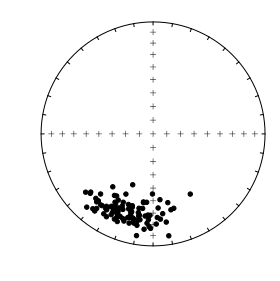

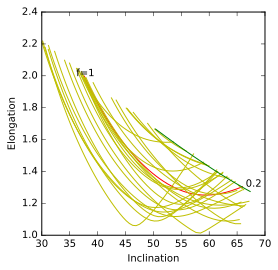

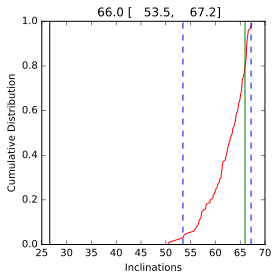

In [79]:
find_EI(data=squished_DIs, nb=100)

In [29]:
bdata = pmag.pseudo(squished_DIs)
Es,Is,Fs,V2s = pmag.find_f(bdata)
Es[-1]

1.2483430575434755